In [ ]:
   import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projects- Data Science/Marketing Segmentation/Marketing_data_cleaned.csv')

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Scaling the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
df_scaled.shape

(8950, 17)

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
wcss = []

for i in range(1,20):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

In [ ]:
wcss

[152149.99999999983,
 127785.12272063471,
 111986.69806610125,
 99073.93826774803,
 91513.3933702044,
 84852.59400226288,
 79883.37333673787,
 75569.24540183917,
 69955.39280487341,
 66465.63837645964,
 63618.87671914468,
 61386.42454172166,
 59165.22508552805,
 57489.935917916126,
 55938.22554842105,
 54426.84012106659,
 53015.284272098215,
 52291.320003808934,
 50809.1113650245]

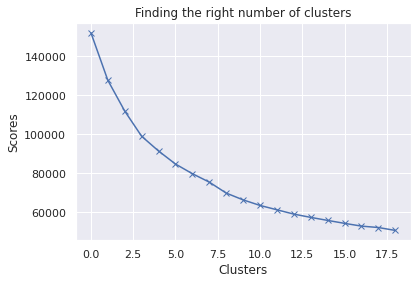

In [ ]:
plt.plot(wcss, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

## Applying K-Means method

In [ ]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.361622,0.332427,-0.034815,-0.242493,0.362991,-0.362239,0.993026,-0.384184,1.205460,-0.472930,-0.359669,0.189326,-0.261570,-0.214444,-0.030388,0.313197,0.256258
1,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809
2,0.012407,0.404017,-0.357249,-0.241767,-0.400430,-0.095082,-0.853542,-0.394838,-0.754970,0.102919,-0.028842,-0.481782,-0.303086,-0.250597,-0.011630,-0.455621,0.273456
3,1.684378,0.392729,-0.217494,-0.155556,-0.228546,2.007810,-0.471593,-0.208498,-0.411691,1.912655,1.919139,-0.265987,1.027732,0.820395,0.551555,-0.390256,0.070846
4,1.042239,0.465006,2.500780,1.806350,2.594499,-0.161300,1.164798,1.562962,1.273275,-0.284847,-0.150801,3.128411,1.303209,1.436890,0.559682,0.251719,0.337526
5,-0.701251,-2.141884,-0.310520,-0.235029,-0.302316,-0.322150,-0.555316,-0.442677,-0.440150,-0.521105,-0.376272,-0.419502,-0.175348,-0.202111,-0.256754,0.281920,0.198841
6,-0.135630,0.400131,0.539387,0.669386,0.045410,-0.331722,0.977756,1.902452,0.168801,-0.414087,-0.330446,0.616253,0.429303,0.143434,-0.158654,0.445917,0.268936
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.691237e+06,1.103743,1.985447e+06,3.158687e+05,6.689656e+05,4.607338e+05,0.847109,0.228665,0.699673,0.143250,8.669688,497.312973,1.289447e+07,3.221878e+06,1.849821e+06,0.225466,27.389379
1,1.801251e+06,1.065594,8.301540e+05,3.938268e+05,1.375460e+05,2.350225e+06,0.654660,0.237409,0.473871,0.174485,25.430428,140.906223,8.893277e+06,1.727305e+06,8.783327e+05,0.199892,21.194434
2,3.311639e+06,1.107760,5.136337e+05,3.178693e+05,4.468809e+04,1.635584e+06,0.549663,0.227716,0.390029,0.166309,24.076485,82.680406,1.234488e+07,2.918899e+06,1.951701e+06,0.159697,27.420179
3,1.055510e+07,1.107127,1.151574e+06,5.553727e+05,1.852445e+05,1.088327e+07,0.611188,0.244300,0.444249,0.238778,114.795116,216.005726,2.996227e+07,1.189430e+07,5.010373e+06,0.165289,27.057319
4,7.773168e+06,1.111183,1.355967e+07,5.960268e+06,2.493750e+06,1.344385e+06,0.874778,0.401950,0.710384,0.150781,18.396774,2313.178732,3.360905e+07,1.706081e+07,5.054511e+06,0.220207,27.534923
5,2.198629e+05,0.964891,7.269358e+05,3.364317e+05,1.249201e+05,6.370294e+05,0.597701,0.223459,0.439754,0.141321,7.896486,121.158555,1.403589e+07,3.325231e+06,6.204225e+05,0.222791,27.286548
6,2.670298e+06,1.107542,4.606504e+06,2.828023e+06,4.092681e+05,5.949344e+05,0.844649,0.432162,0.535936,0.145606,10.030592,761.083181,2.204026e+07,6.221061e+06,1.153206e+06,0.236820,27.412085
7,1.125230e+07,1.104201,5.827737e+07,3.631210e+07,4.882896e+06,3.252195e+06,0.855187,0.453750,0.650915,0.146956,20.309490,3195.275483,5.852224e+07,8.084371e+07,7.613703e+06,0.303234,27.464869


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.max(), labels.min()

(7, 0)

In [ ]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([4, 2, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


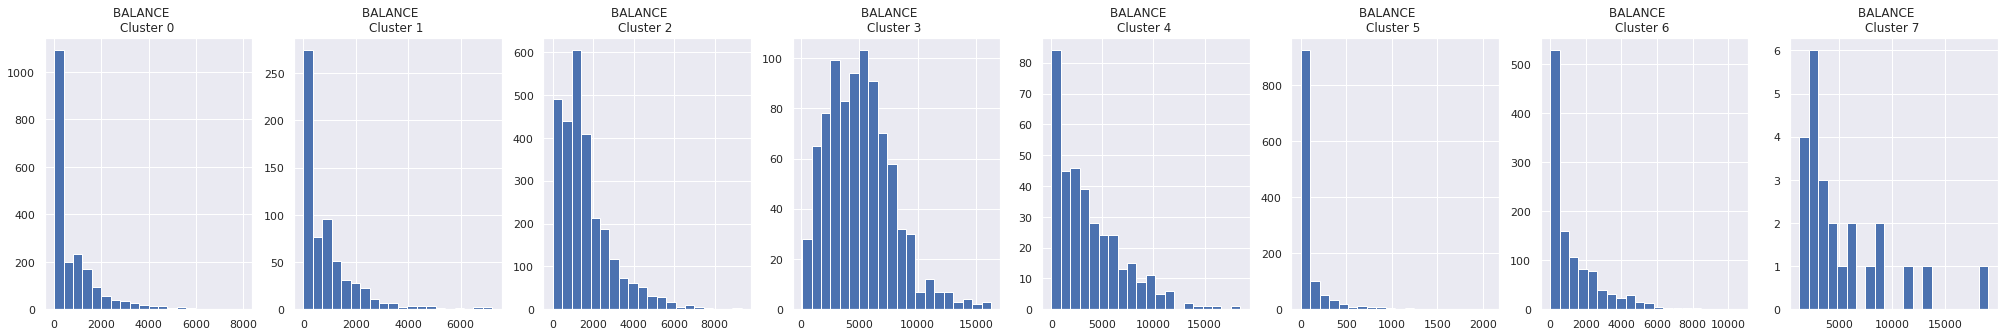

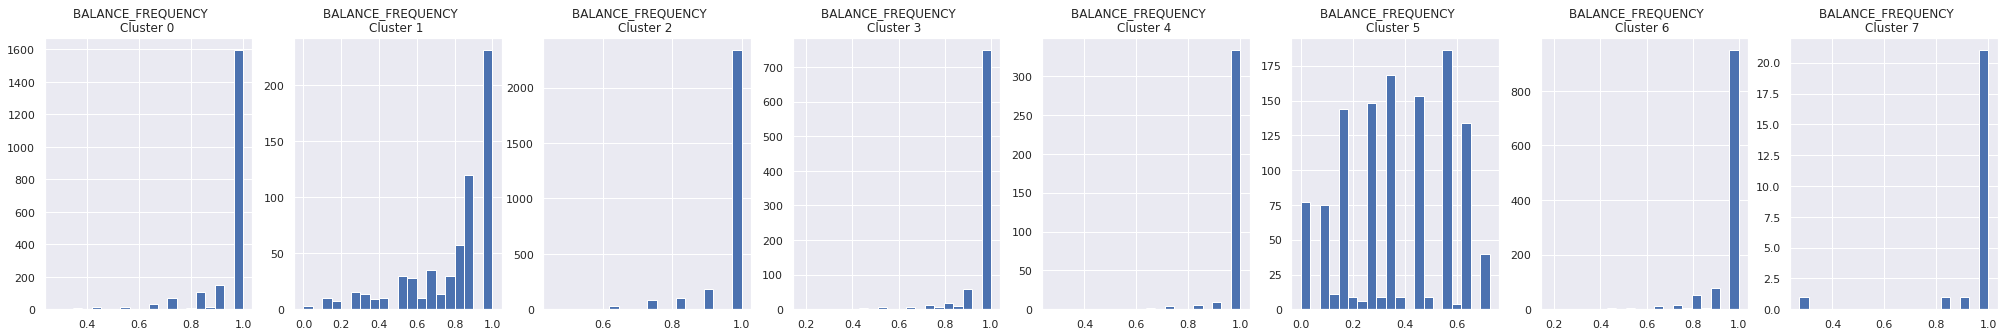

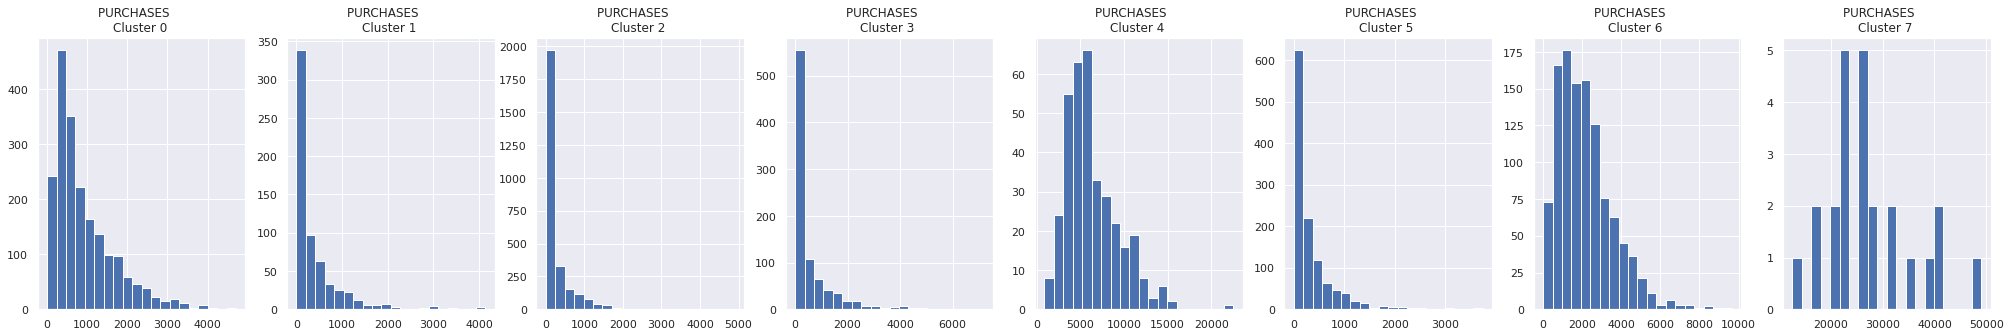

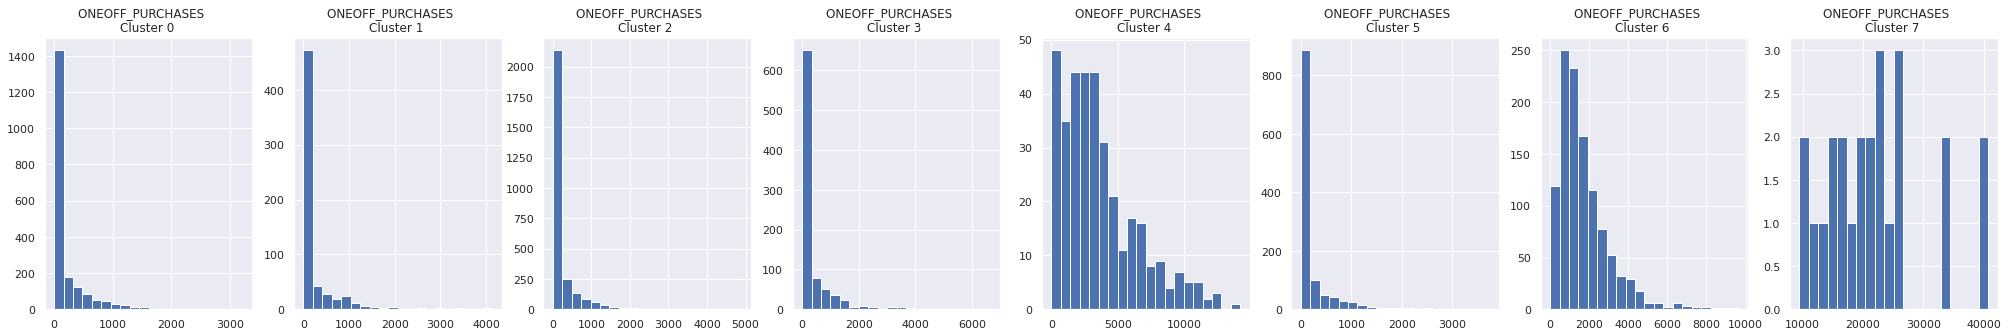

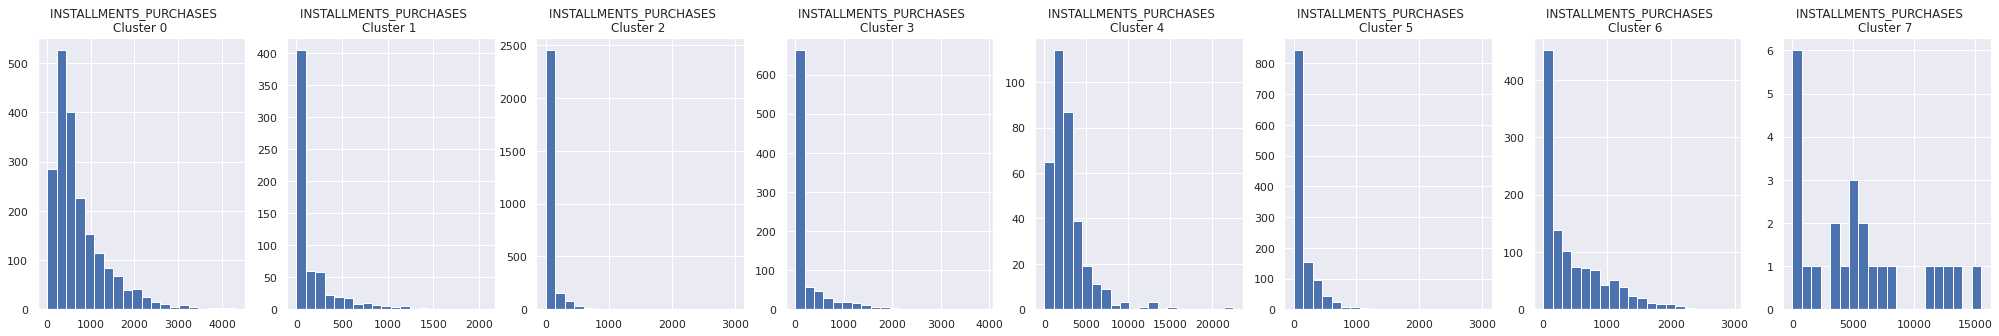

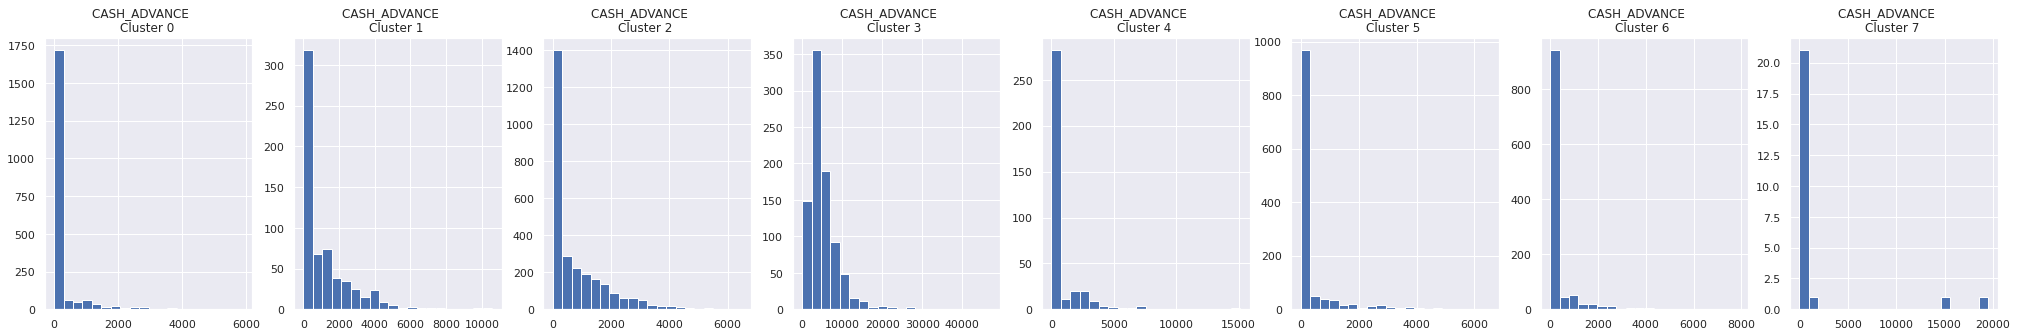

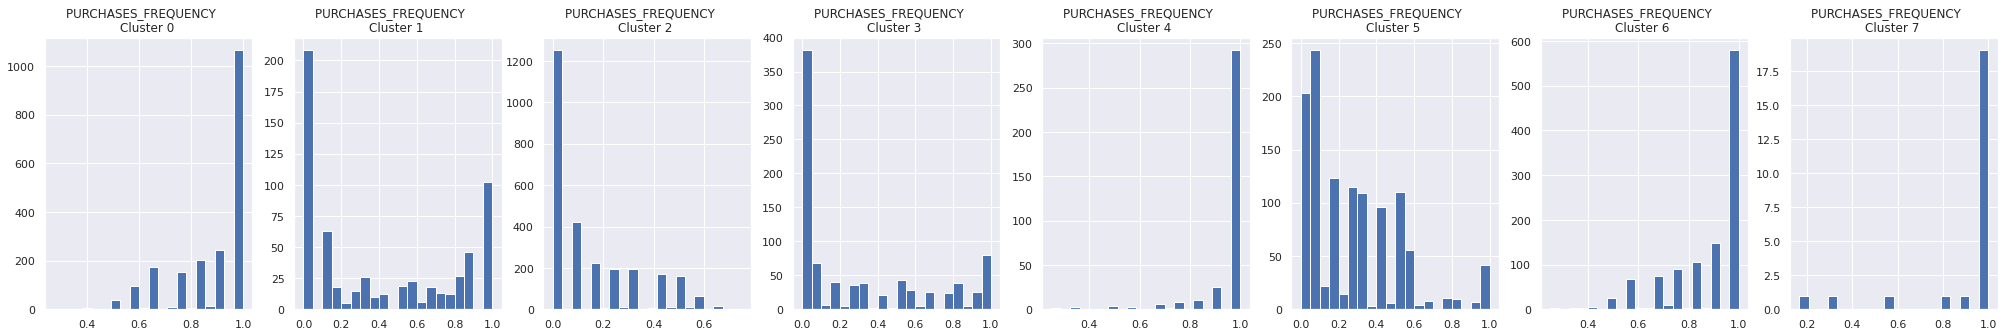

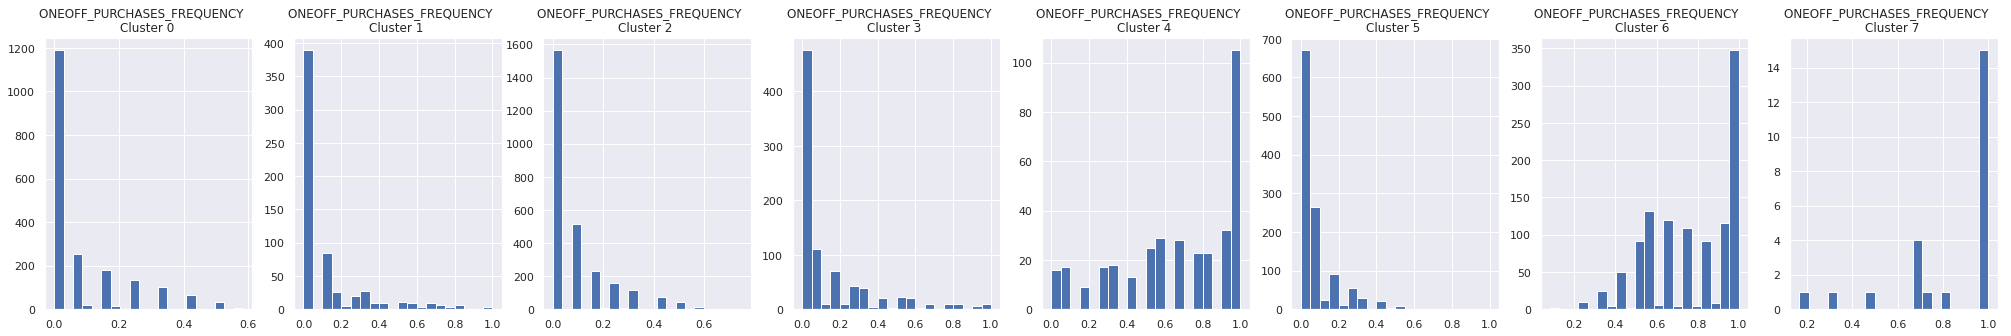

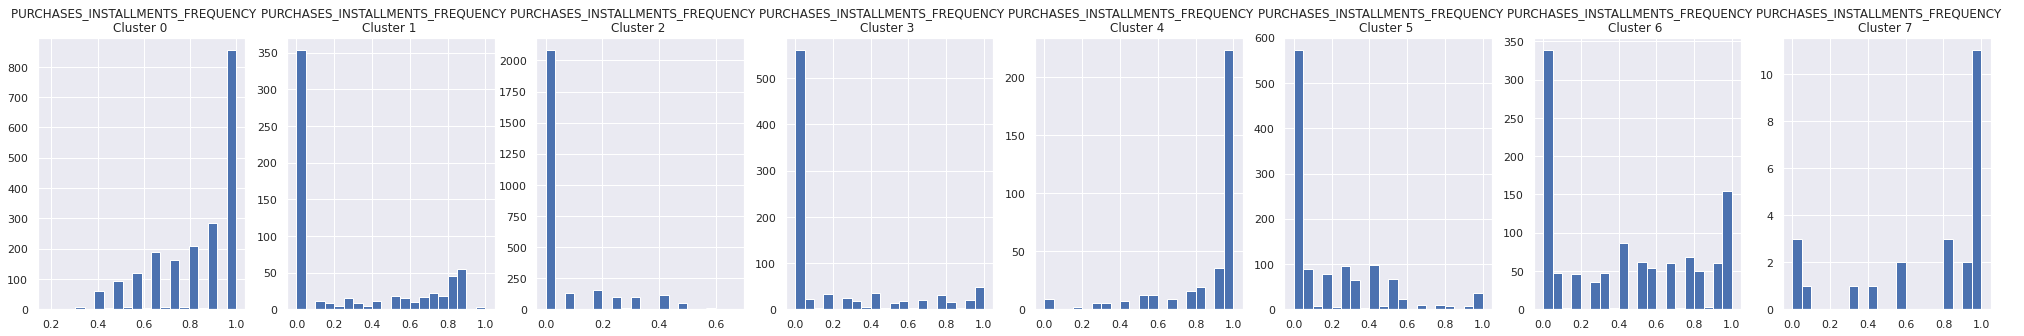

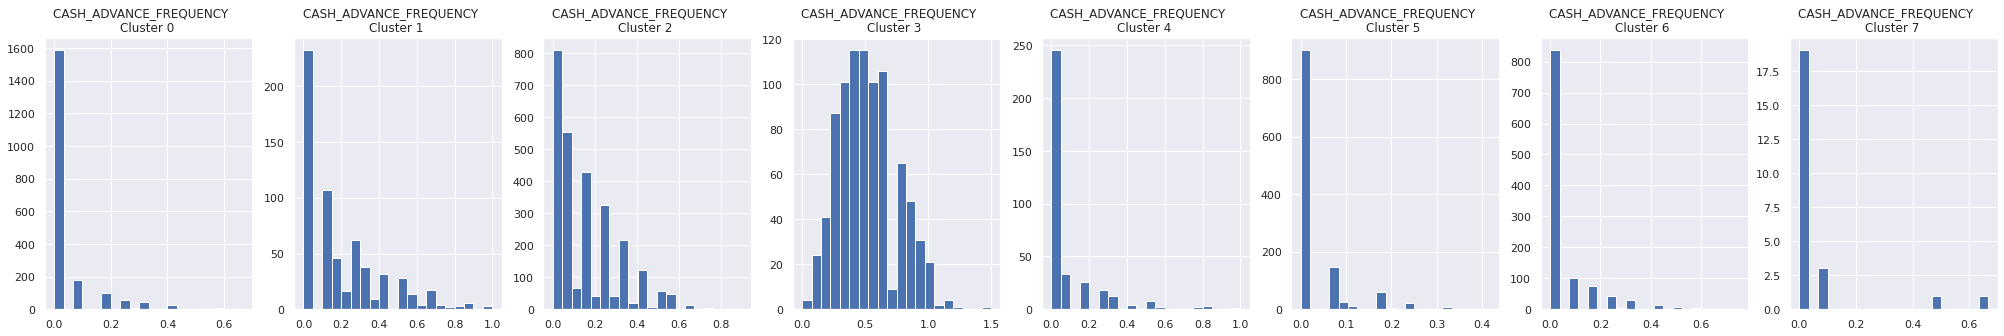

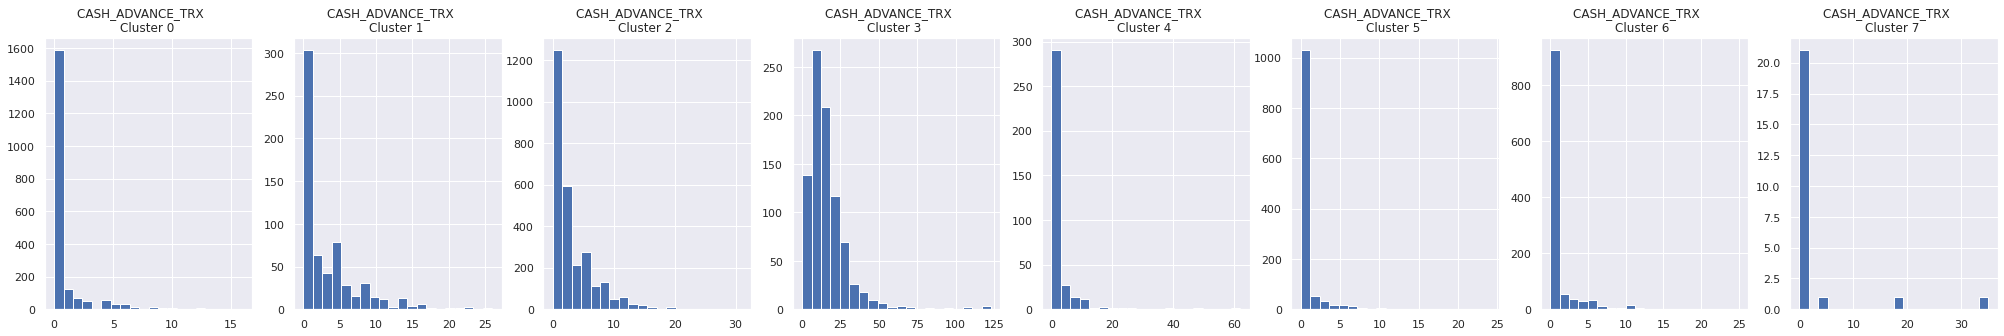

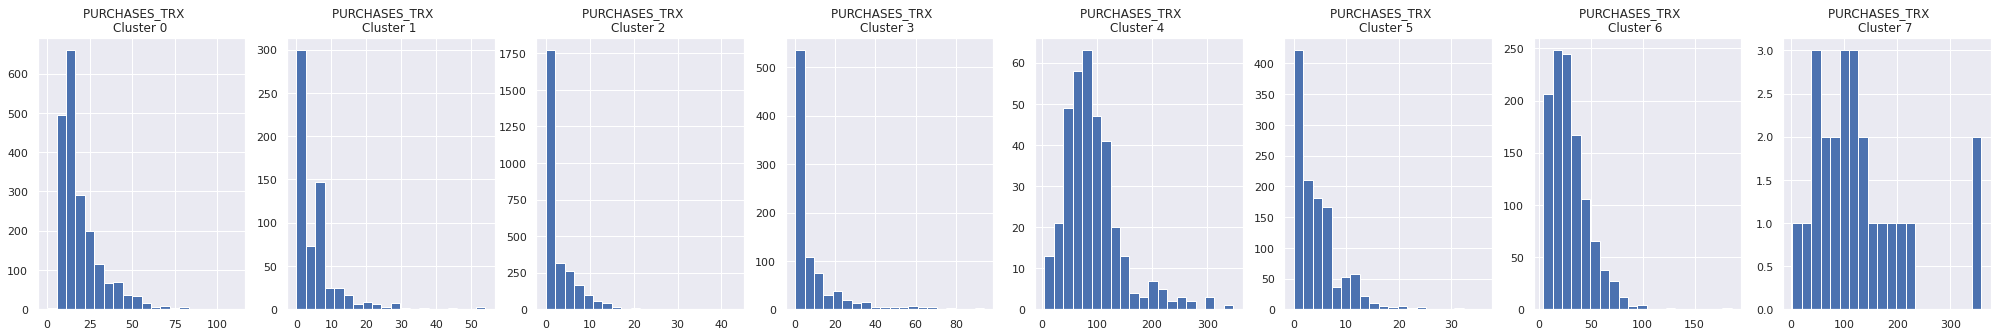

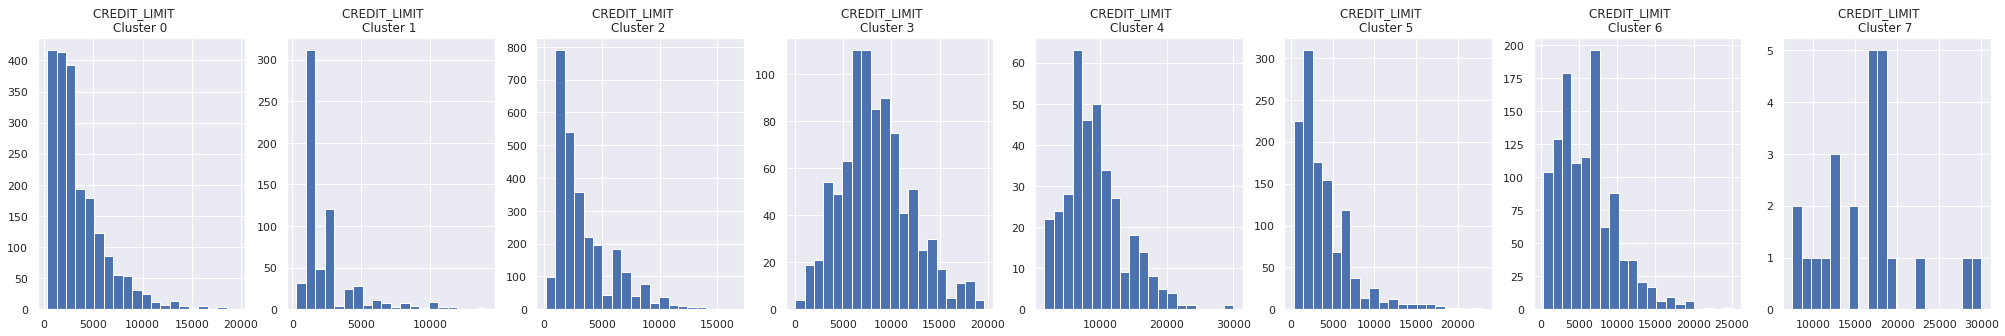

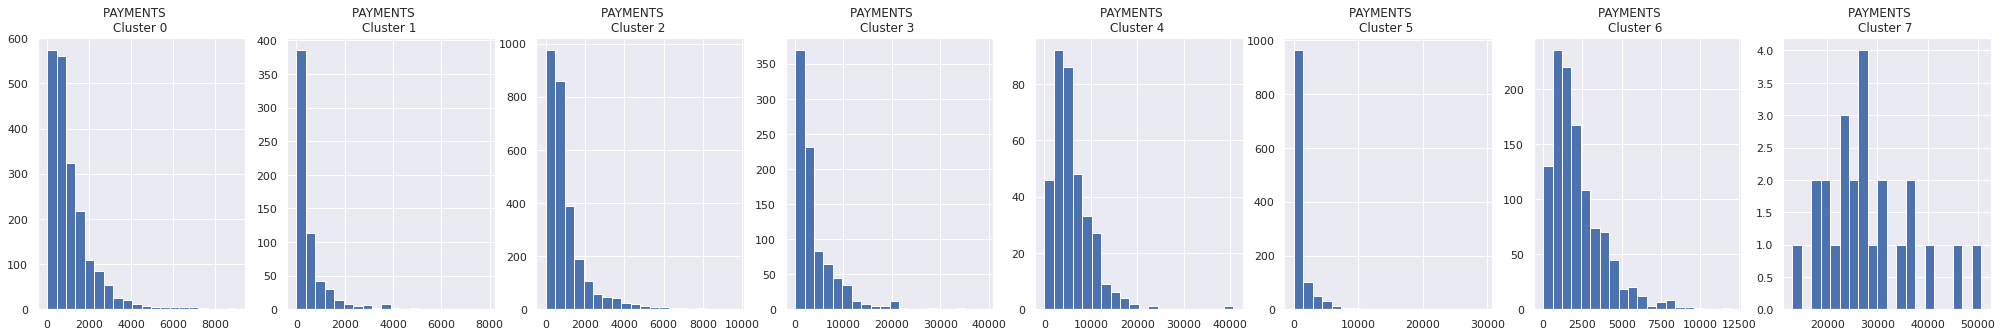

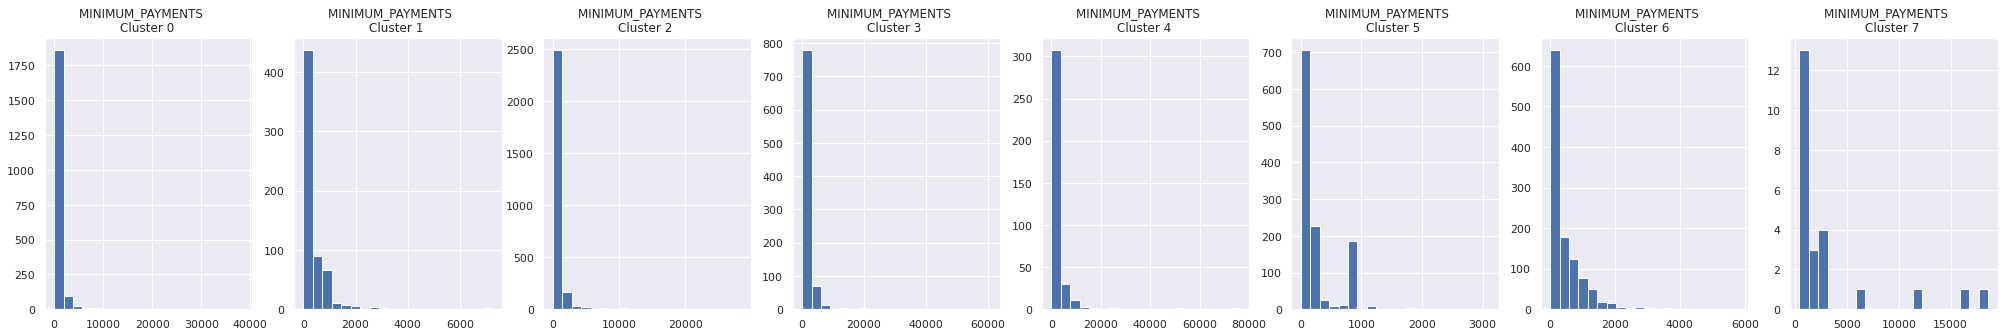

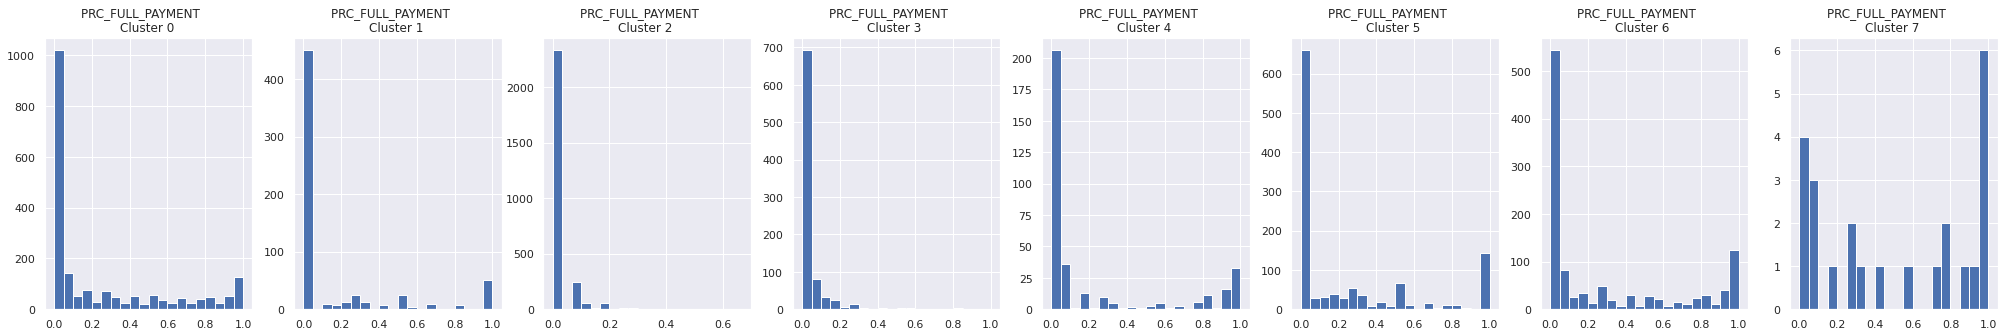

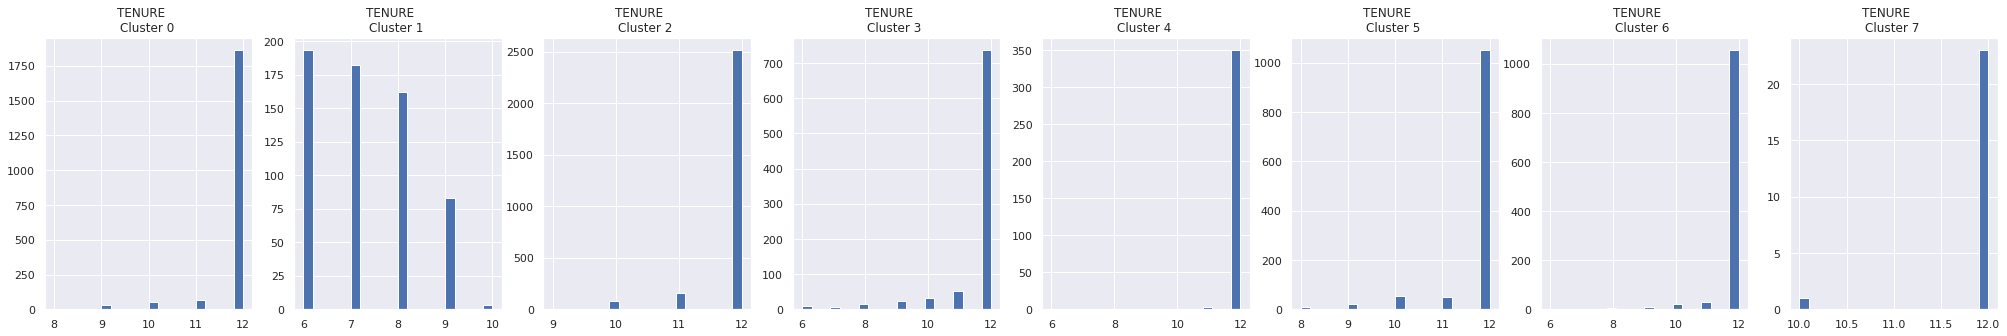

In [ ]:
# Plot the histogram of various clusters
for i in df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
  plt.show()

## Apply PCA

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68221954, -1.07645309],
       [-1.13829834,  2.50646299],
       [ 0.96968537, -0.38351548],
       ...,
       [-0.9262032 , -1.81078616],
       [-2.33654996, -0.65796264],
       [-0.55642245, -0.40045864]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076453
1,-1.138298,2.506463
2,0.969685,-0.383515
3,-0.873624,0.043166
4,-1.599434,-0.688584


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682220,-1.076453,2
1,-1.138298,2.506463,3
2,0.969685,-0.383515,6
3,-0.873624,0.043166,2
4,-1.599434,-0.688584,2


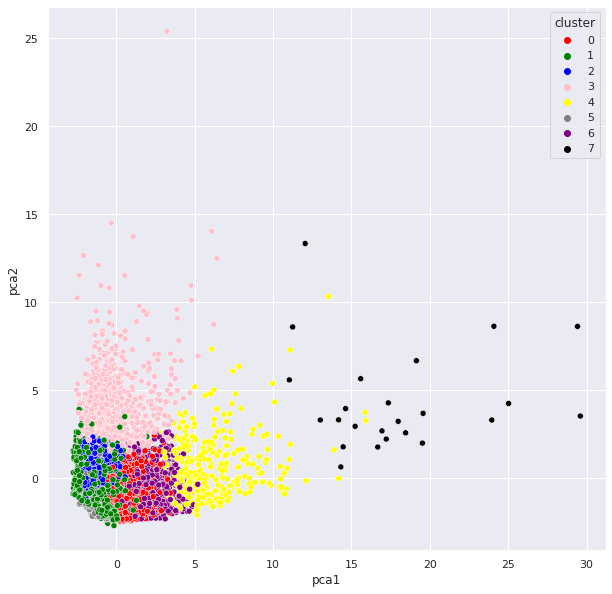

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()